In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [39]:

# Read the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Show the initial five rows of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [40]:
# Retrieve general information about the dataset
df.info()

# Show the summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [44]:
#Step 3 clean the data

In [42]:
# Identify any missing values
missing_values = df.isnull().sum()
missing_values

# If missing values are found, we will decide how to address them
# For now, let's proceed as if there are no missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

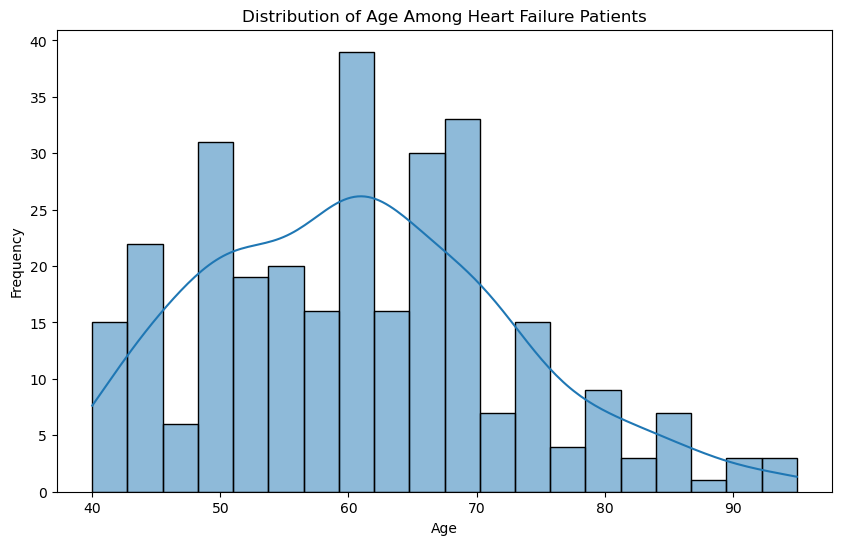

In [17]:

# Visualize the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# insights :- Insights on the Age Distribution Among Heart Failure Patients:
#Age Span: The age of patients experiencing heart failure in the dataset spans roughly from 40 to 95 years.
#Age Concentration: There is a significant concentration of cases between the ages of 60 and 70, highlighting a higher incidence of heart failure within this age group.
#Distribution Pattern: The pattern of age distribution exhibits right skewness, indicating fewer patients in the older age groups compared to middle-aged ones.
#Smooth Distribution: The KDE (Kernel Density Estimate) overlay demonstrates a relatively smooth distribution, suggesting a steady incidence of heart failure across the observed age range, without any abrupt fluctuations.







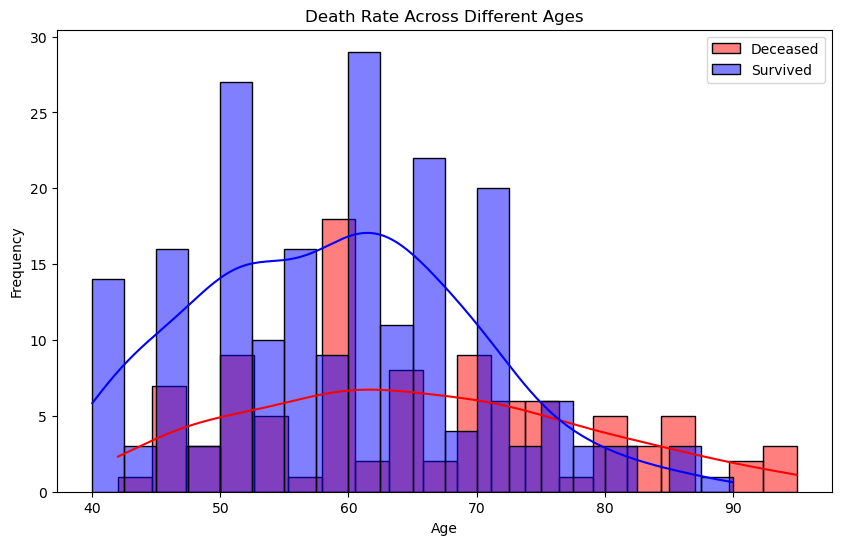

In [18]:
# Visualize death rate by age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['DEATH_EVENT'] == 1]['age'], kde=True, bins=20, color='red', label='Deceased')
sns.histplot(df[df['DEATH_EVENT'] == 0]['age'], kde=True, bins=20, color='blue', label='Survived')
plt.title('Death Rate Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#insights:-
#Increased Mortality Among Older Patients: The death rate escalates with age, with a higher frequency of deceased individuals observed in the older age brackets (60 years and above).
#Distribution of Survivors: Patients who survived are more evenly distributed across the age range, with a notable concentration in the middle-aged group (50-70 years).
#Key Age Range: The ages between 60 and 80 seem to be particularly critical, as the mortality rate is significantly higher in this range, indicating greater susceptibility to heart failure in these age groups.
#Age Group Overlap: Both deceased and surviving patients are present in all age groups, but the deceased group shows a more pronounced peak in the older age ranges compared to the survivors.

1    64.882943
0    35.117057
Name: sex, dtype: float64


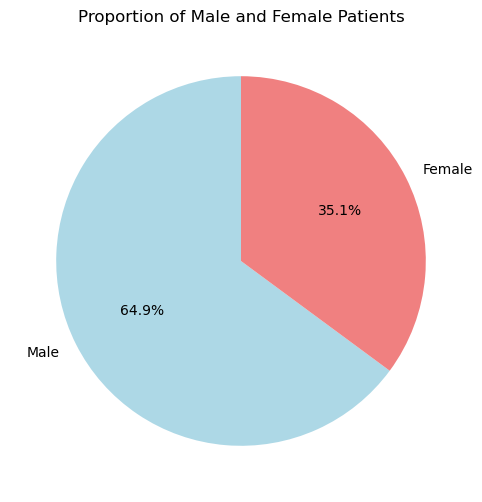

In [19]:
# Compute the percentage of male and female patients
sex_counts = df['sex'].value_counts(normalize=True) * 100
print(sex_counts)

# Visualize the percentage of male and female patients
plt.figure(figsize=(6, 6))
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'], labels=['Male', 'Female'])
plt.title('Proportion of Male and Female Patients')
plt.ylabel('')
plt.show()

#isights:-
#Gender Distribution Analysis: The dataset provides insights into the proportion of male and female patients with heart failure.
#Male Majority: The data shows a higher proportion of male patients relative to female patients.
#Graphical Illustration: A pie chart visually represents the gender distribution, effectively highlighting the proportions of male and female patients.
#Percentage Details: The pie chart includes percentage labels for each gender, offering a straightforward way to grasp the gender composition of the dataset.

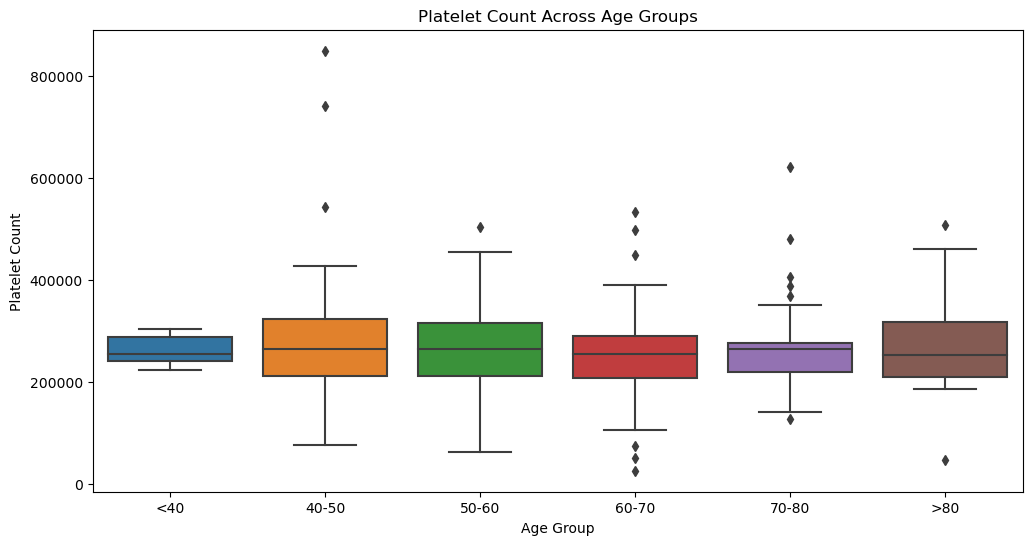

In [20]:
# Create age groups
bins = [0, 40, 50, 60, 70, 80, 100]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '>80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Visualize platelet count across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='platelets', data=df)
plt.title('Platelet Count Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()


#The box plot illustrates platelet counts across various age groups: 
#'<40', '40-50', '50-60', '60-70', '70-80', and '>80'. It allows us to observe how platelet counts 
#differ with age, showing trends in median values, the range of counts, and any outliers. This analysis helps determine 
#if age affects platelet count distributions and highlights significant differences among age groups.

In [ ]:
5. Is there a correlation between creatinine and sodium levels in the blood?

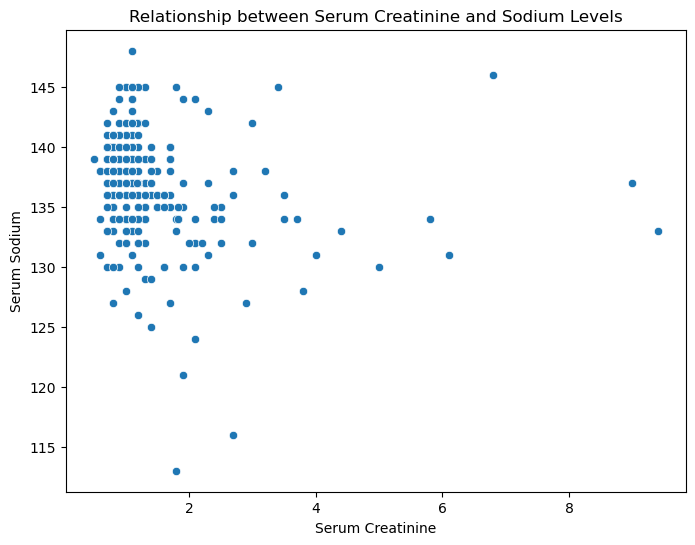

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


In [32]:
# Create a scatter plot to visualize the relationship between creatinine and sodium levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df)
plt.title('Relationship between Serum Creatinine and Sodium Levels')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()

# Compute the correlation coefficient between serum creatinine and sodium
correlation_matrix = df[['serum_creatinine', 'serum_sodium']].corr()
correlation_matrix


#insights
#he scatter plot illustrates the relationship between serum 
#creatinine and sodium levels. The correlation coefficient reveals how
#strongly these variables are related: a value close to 1 or -1 indicates a strong relationship, 
#while a value near 0 suggests a weak one. A positive correlation means higher creatinine 
#levels are associated with higher sodium levels, whereas a negative correlation indicates higher creatinine
#is linked to lower sodium levels. Analyzing this relationship is useful for evaluating kidney function and diagnosing related health issues.

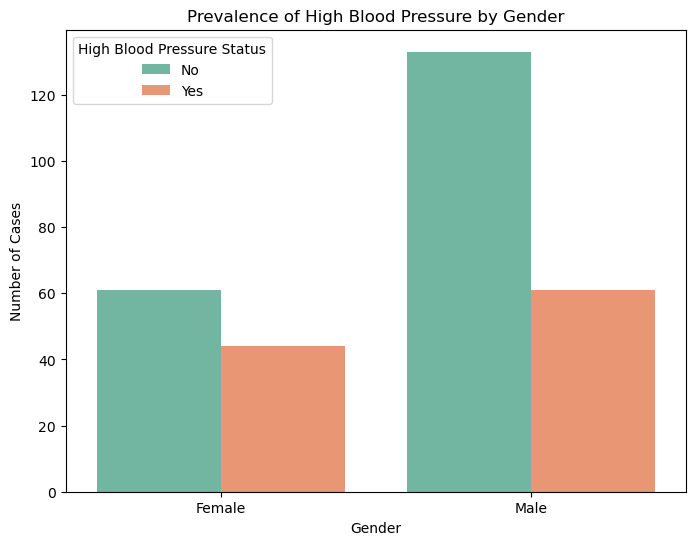

In [33]:
# Visualize the occurrence of high blood pressure across different genders
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='high_blood_pressure', data=df, palette='Set2')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='High Blood Pressure Status', labels=['No', 'Yes'])
plt.show()


#insights
#The count plot illustrates the variation in high blood pressure prevalence between genders.
#It displays the number of cases for each gender and employs color coding to differentiate between those
#with and without high blood pressure. Variations in the bar heights indicate which gender experiences higher rates
#of high blood pressure, providing insights for targeted health interventions.

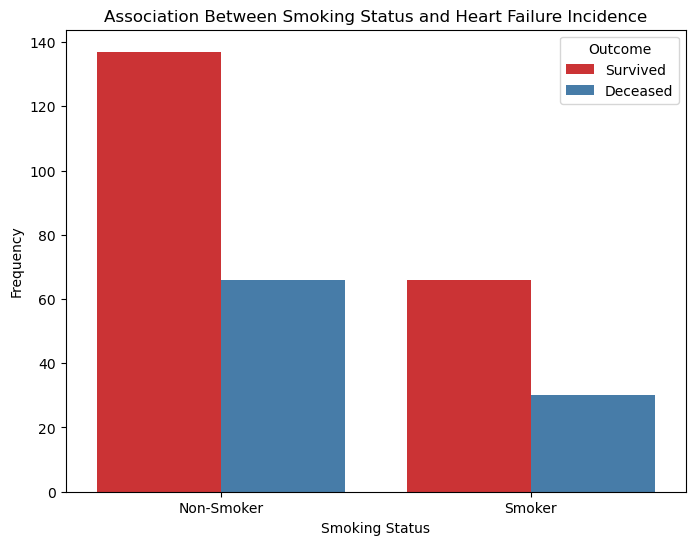

In [34]:
# Display the association between smoking status and heart failure incidence
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='Set1')
plt.title('Association Between Smoking Status and Heart Failure Incidence')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.legend(title='Outcome', labels=['Survived', 'Deceased'])
plt.show()


#insights
#The plot illustrates the connection between smoking status and heart failure by comparing the 
#frequency of heart failure cases among smokers and non-smokers. It indicates which group is more 
#prone to heart failure and shows the survival outcomes for each group. This analysis aids in understanding 
#the effects of smoking on heart failure and can inform strategies for prevention and treatment.








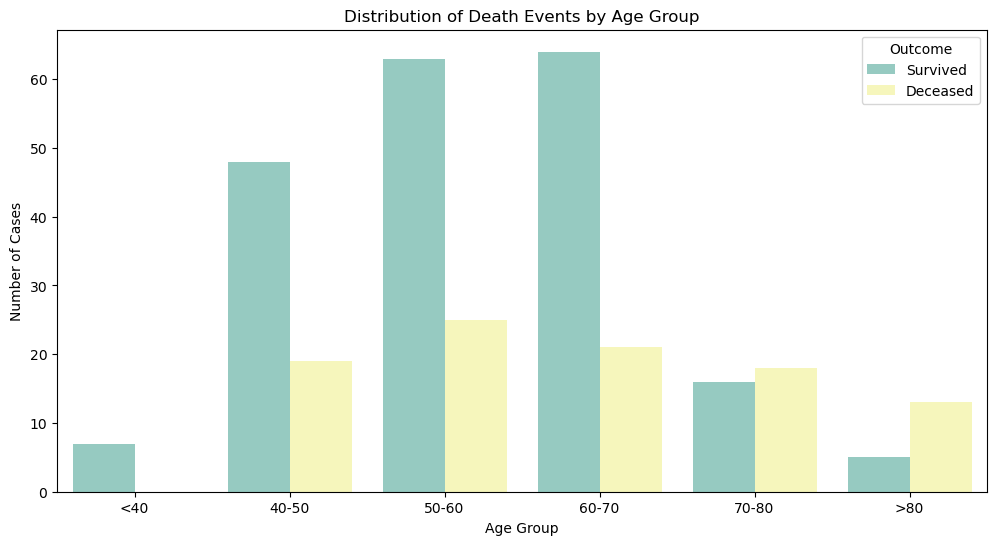

In [35]:
# Illustrate the distribution of death events across various age groups
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='DEATH_EVENT', data=df, palette='Set3')
plt.title('Distribution of Death Events by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Outcome', labels=['Survived', 'Deceased'])
plt.show()


#insights :-
#The plot illustrates how death events are distributed among various age groups,
#revealing if certain age ranges have higher death rates. It differentiates between those who 
#survived and those who died. Noticing trends, such as increased mortality in older age groups, provides insight 
#into age-related risks and supports the development of targeted health interventions.








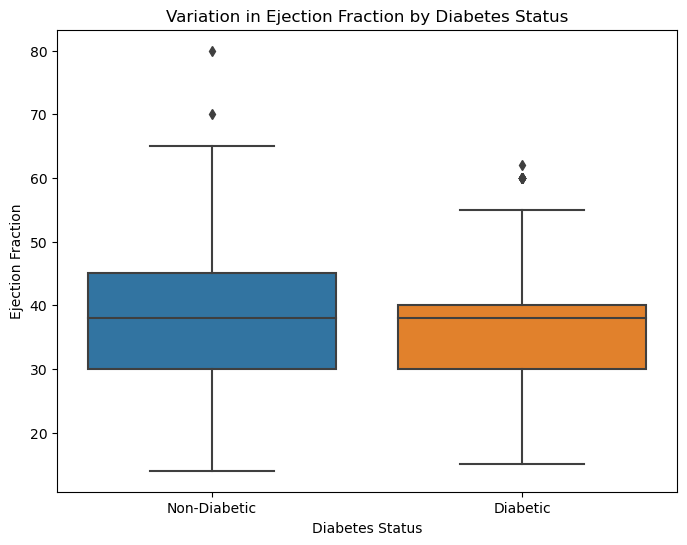

In [36]:
# Create a box plot to show ejection fraction variations based on diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Variation in Ejection Fraction by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()


#insights;-
#The plot illustrates ejection fraction levels for patients with and without diabetes, 
#highlighting the median, range, and variability within each group, as well as any outliers.
#Differences between the two groups can provide insights into the effects of diabetes on heart 
#function and guide clinical decision-making.

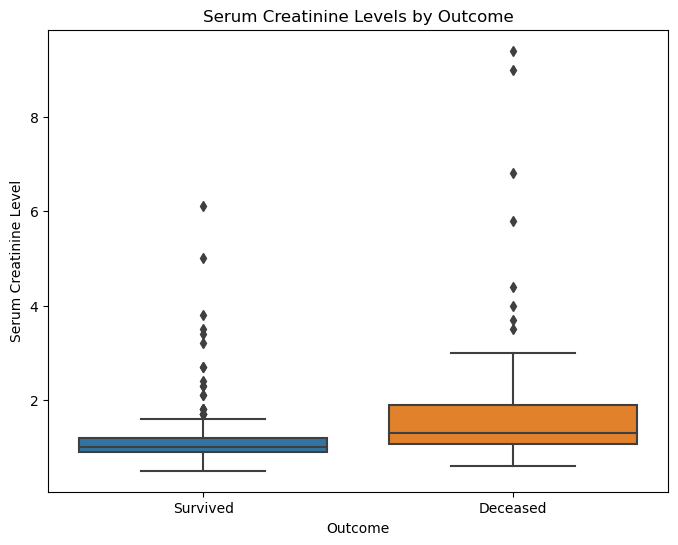

In [37]:
# Display a box plot of serum creatinine levels according to survival status
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Deceased'])
plt.show()


#insights :-  
#The box plot contrasts serum creatinine levels between survivors and non-survivors. 
#It displays the median and range of creatinine levels for each group, revealing any notable differences. 
#Variations in median levels between the two groups can suggest how serum creatinine is associated with survival outcomes.